In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Project 360DiGITMG\Datasets\Modified_Glass_Manufacturing_Energy_Optimization.csv", delimiter = ',',)

In [3]:
df.head()

,Date,Shift,Furnace_ID,Furnace_Type,Batch_Type,Production_Output (tons),Energy_Consumption (kWh),Furnace_Temperature (°C),Annealing_Time (hrs),Downtime (hrs),Ambient_Temperature (°C),Recycled_Content (%),Energy_Rating,Maintenance_Flag,Fuel_Type,Glass_Thickness (mm),Production_Target (tons),Defects_Percentage (%),Melting_Time (hrs),Cooling_Energy (kWh)
0,01-01-2023 0.00,Morning,Furnace_1,Electric,Borosilicate,107.35,3288.96,1468.9,30.80,4.19,16.7,56.0,B,No,Natural Gas,9.79,57.77,5.55,21.9,258.78
1,01-01-2023 1.00,Afternoon,Furnace_6,Hybrid,Soda-lime,43.51,4867.96,1445.2,3.68,4.74,19.4,NaN,A,Yes,Electricity,3.45,126.89,0.48,14.0,707.82
2,01-01-2023 2.00,Night,Furnace_9,Gas,Lead,37.79,3347.15,1486.8,2.48,2.88,20.6,61.0,B,No,Electricity,8.35,173.87,2.54,11.9,743.58
3,01-01-2023 3.00,Afternoon,Furnace_9,Gas,Soda-lime,77.12,2829.63,1626.8,1.90,2.41,22.6,51.0,A,No,Natural Gas,10.00,108.02,5.96,11.1,421.00
4,01-01-2023 4.00,Morning,Furnace_6,Electric,Soda-lime,169.49,3935.36,1593.9,3.81,43.40,31.4,NaN,B,Yes,Natural Gas,8.60,77.60,NaN,12.2,275.03


In [4]:
print(df.dtypes)

Date                         object
Shift                        object
Furnace_ID                   object
Furnace_Type                 object
Batch_Type                   object
Production_Output (tons)    float64
Energy_Consumption (kWh)    float64
Furnace_Temperature (°C)    float64
Annealing_Time (hrs)        float64
Downtime (hrs)              float64
Ambient_Temperature (°C)    float64
Recycled_Content (%)        float64
Energy_Rating                object
Maintenance_Flag             object
Fuel_Type                    object
Glass_Thickness (mm)        float64
Production_Target (tons)    float64
Defects_Percentage (%)      float64
Melting_Time (hrs)          float64
Cooling_Energy (kWh)        float64
dtype: object


# Data preprocessing

duplicate 

In [7]:
df.duplicated().sum()

0

missing value

In [9]:
df.isnull().sum()

Date                         0
Shift                        0
Furnace_ID                   0
Furnace_Type                 0
Batch_Type                   0
Production_Output (tons)    50
Energy_Consumption (kWh)    50
Furnace_Temperature (°C)    50
Annealing_Time (hrs)        50
Downtime (hrs)              50
Ambient_Temperature (°C)    50
Recycled_Content (%)        50
Energy_Rating                0
Maintenance_Flag             0
Fuel_Type                    0
Glass_Thickness (mm)        50
Production_Target (tons)    50
Defects_Percentage (%)      50
Melting_Time (hrs)          50
Cooling_Energy (kWh)        50
dtype: int64

In [10]:
# Select the relevant columns and fill missing values with the median
columns_to_fill = [
    'Production_Output (tons)', 'Energy_Consumption (kWh)', 'Furnace_Temperature (°C)', 
    'Annealing_Time (hrs)', 'Downtime (hrs)', 'Ambient_Temperature (°C)', 
    'Recycled_Content (%)', 'Glass_Thickness (mm)', 'Production_Target (tons)', 
    'Defects_Percentage (%)', 'Melting_Time (hrs)', 'Cooling_Energy (kWh)'
]

# Fill missing values with the median of each respective column
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())

In [11]:
df.isnull().sum()

Date                        0
Shift                       0
Furnace_ID                  0
Furnace_Type                0
Batch_Type                  0
Production_Output (tons)    0
Energy_Consumption (kWh)    0
Furnace_Temperature (°C)    0
Annealing_Time (hrs)        0
Downtime (hrs)              0
Ambient_Temperature (°C)    0
Recycled_Content (%)        0
Energy_Rating               0
Maintenance_Flag            0
Fuel_Type                   0
Glass_Thickness (mm)        0
Production_Target (tons)    0
Defects_Percentage (%)      0
Melting_Time (hrs)          0
Cooling_Energy (kWh)        0
dtype: int64

Outliers Treatments

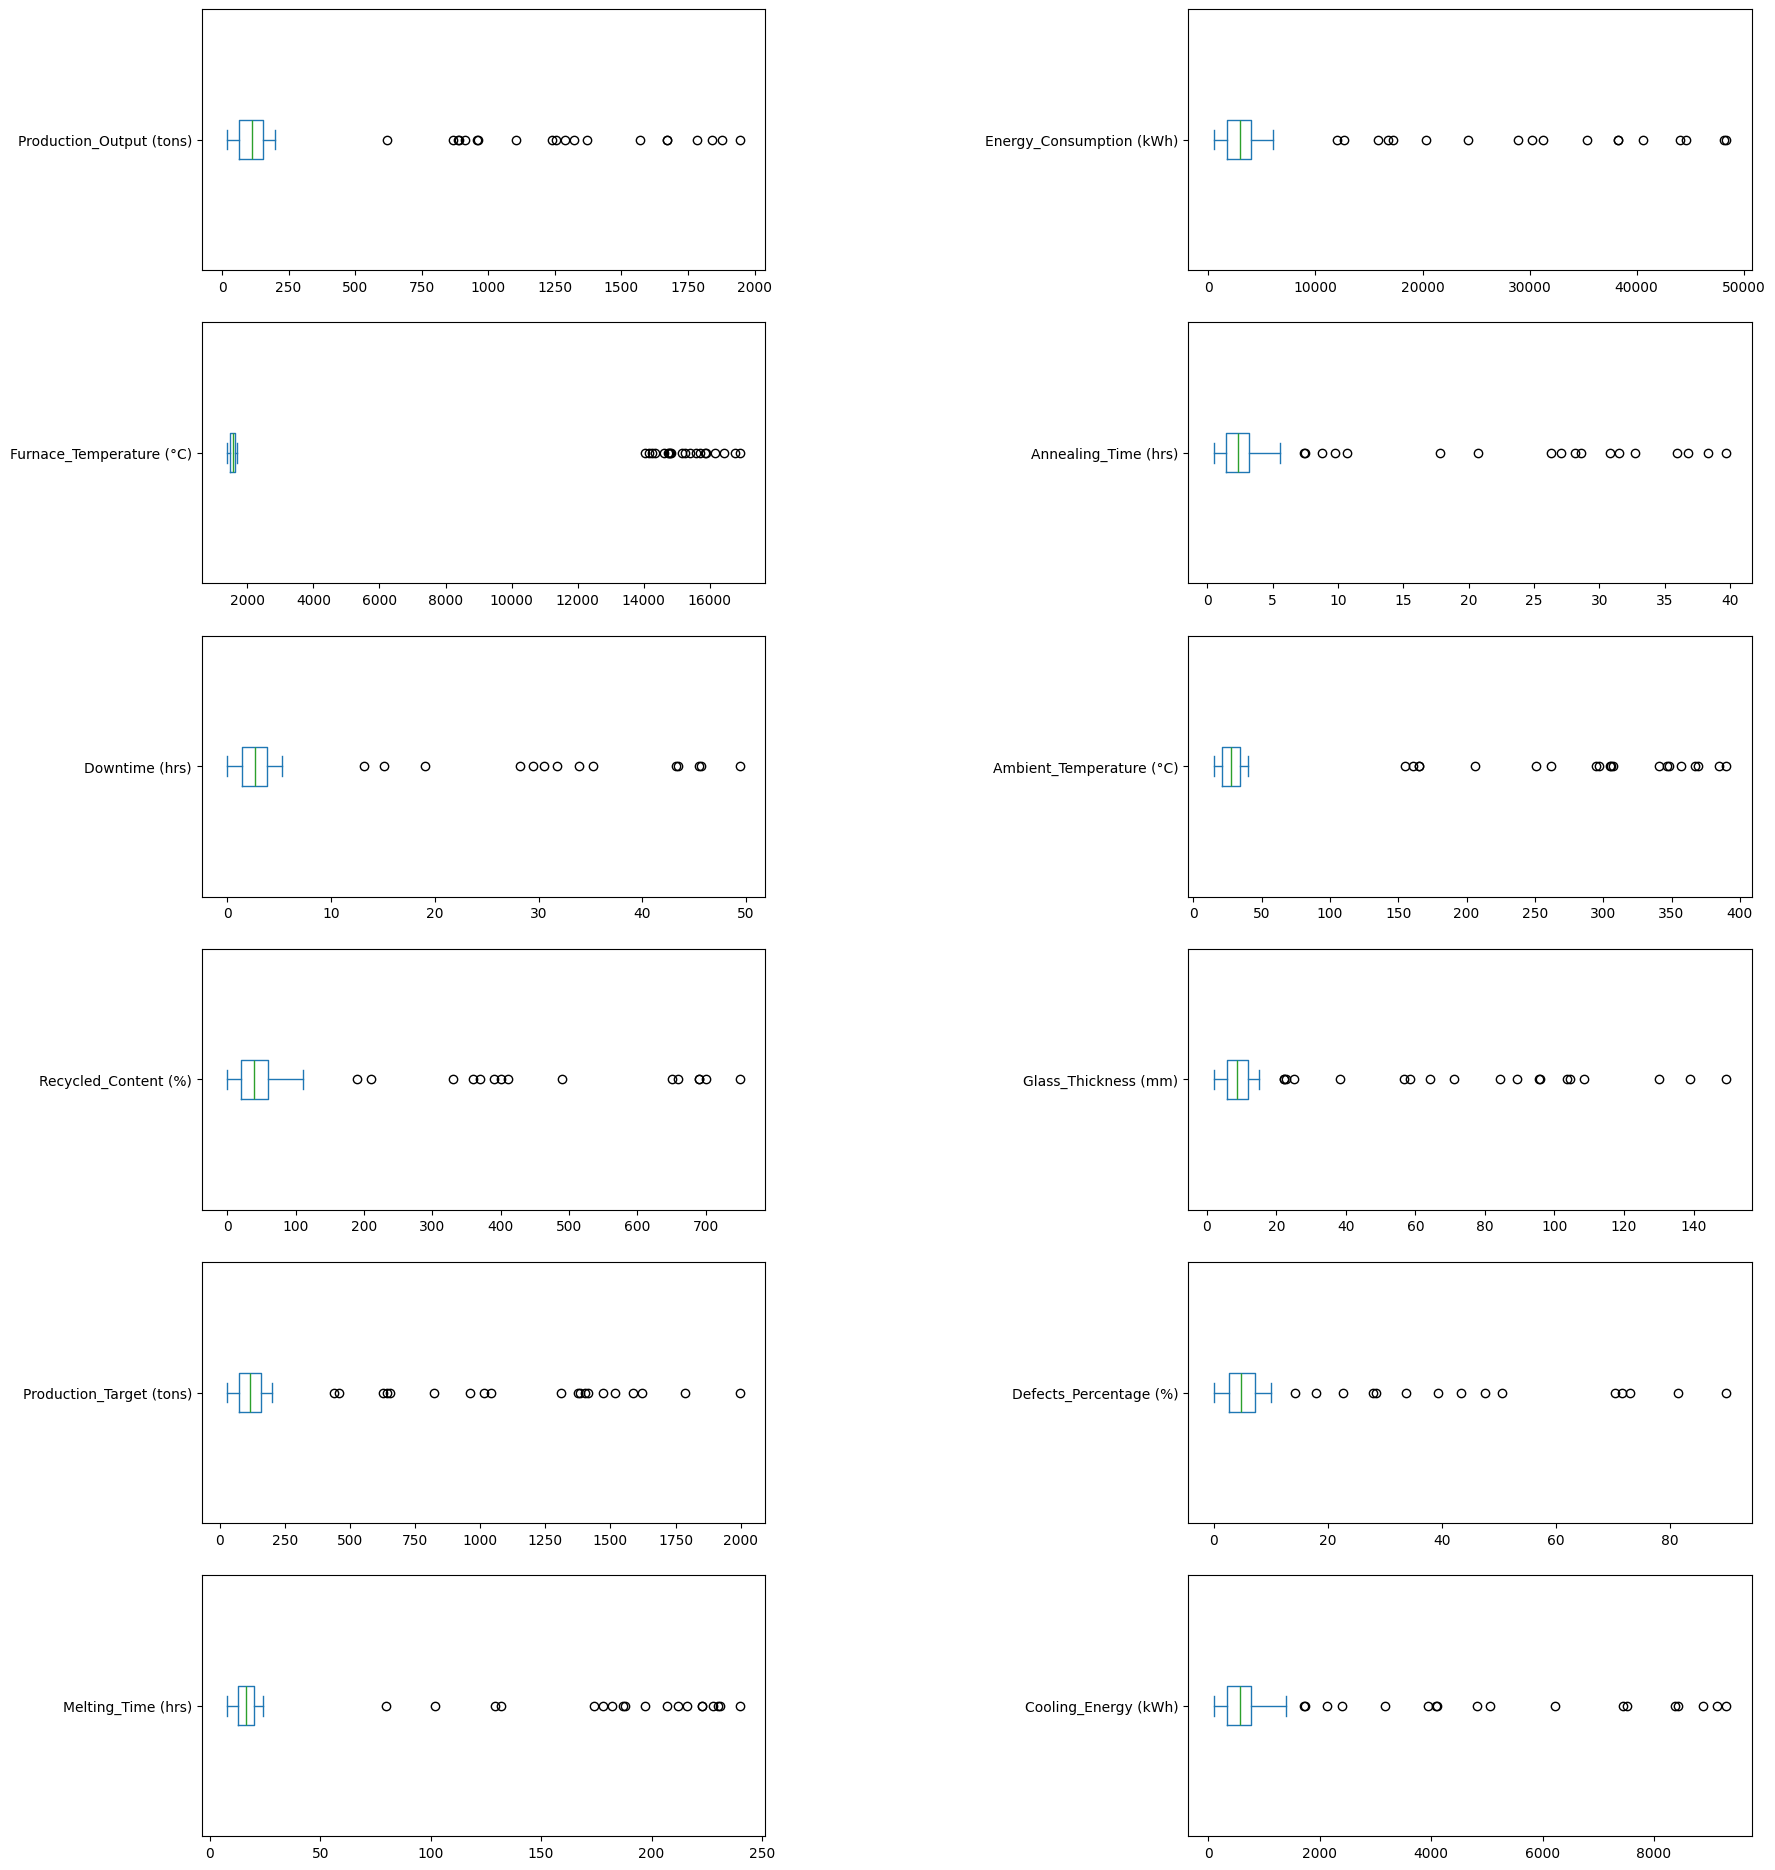

In [13]:
df.plot(kind="box", sharey=False, sharex=False, subplots=True, figsize=(20,40), layout=[10,2],vert=0)
plt.subplots_adjust(wspace=0.75)

In [14]:
from feature_engine.outliers import Winsorizer



In [15]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Production_Output (tons)'])

In [16]:
df = win_df.fit_transform(df)

<Axes: ylabel='Production_Output (tons)'>

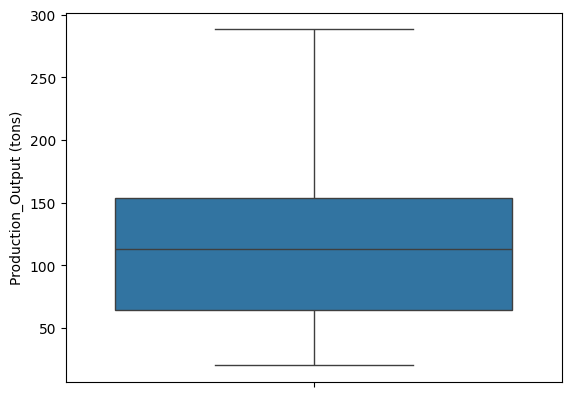

In [17]:
sns.boxplot(df['Production_Output (tons)'])

In [18]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Energy_Consumption (kWh)'])

In [19]:
df = win_df.fit_transform(df)

<Axes: ylabel='Energy_Consumption (kWh)'>

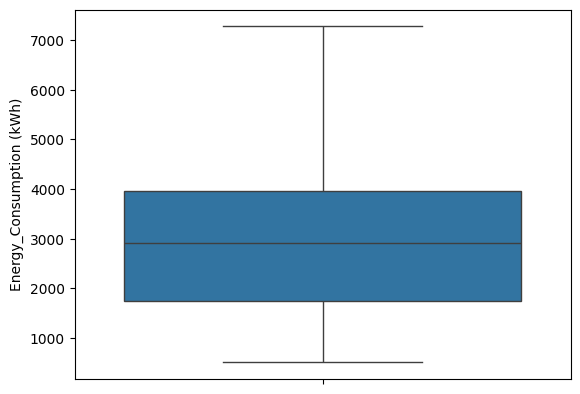

In [20]:
sns.boxplot(df['Energy_Consumption (kWh)'])

In [21]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Furnace_Temperature (°C)'])

In [22]:
df = win_df.fit_transform(df)

<Axes: ylabel='Furnace_Temperature (°C)'>

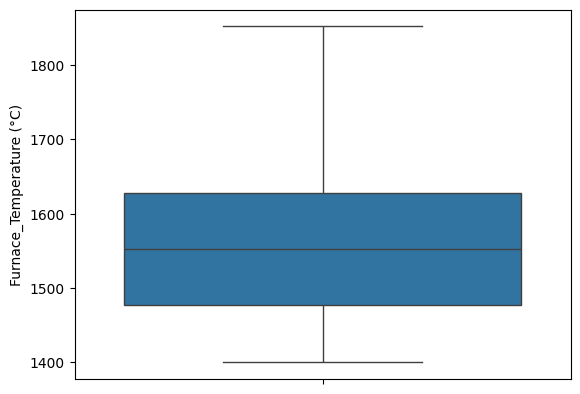

In [23]:
sns.boxplot(df['Furnace_Temperature (°C)'])

In [24]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Annealing_Time (hrs)'])

In [25]:
df = win_df.fit_transform(df)

<Axes: ylabel='Annealing_Time (hrs)'>

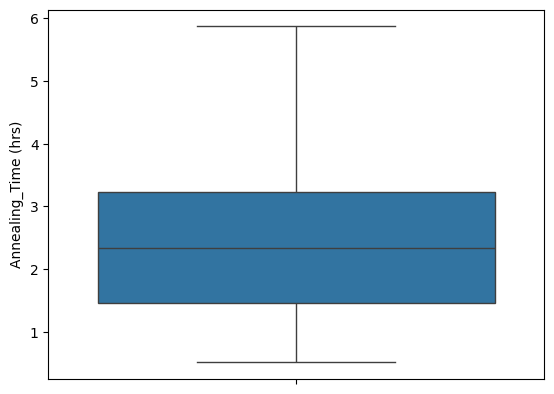

In [26]:
sns.boxplot(df['Annealing_Time (hrs)'])

In [27]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Downtime (hrs)'])

In [28]:
df = win_df.fit_transform(df)

<Axes: ylabel='Downtime (hrs)'>

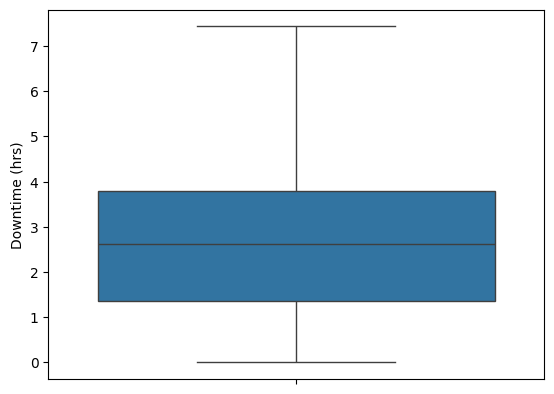

In [29]:
sns.boxplot(df['Downtime (hrs)'])

In [30]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Ambient_Temperature (°C)'])

In [31]:
df = win_df.fit_transform(df)

<Axes: ylabel='Ambient_Temperature (°C)'>

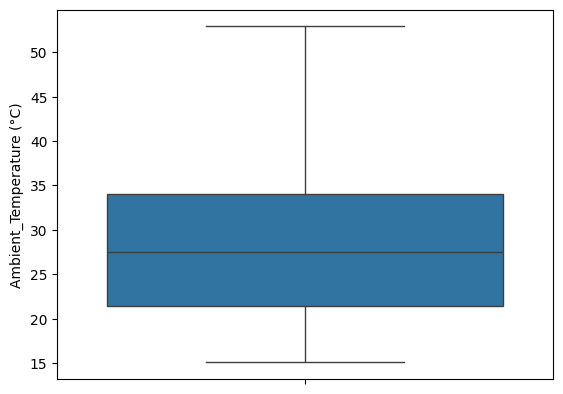

In [32]:
sns.boxplot(df['Ambient_Temperature (°C)'])

In [33]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Recycled_Content (%)'])

In [34]:
df = win_df.fit_transform(df)

<Axes: ylabel='Recycled_Content (%)'>

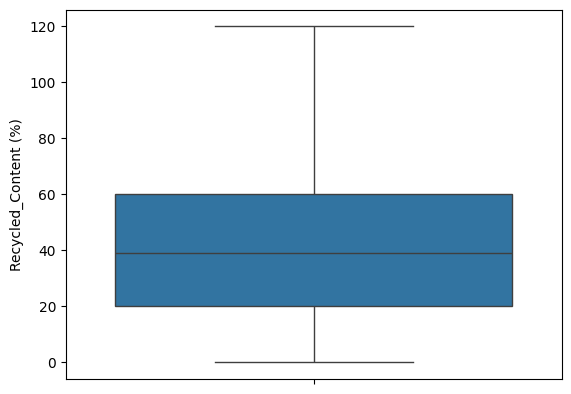

In [35]:
sns.boxplot(df['Recycled_Content (%)'])

In [36]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Glass_Thickness (mm)'])

In [37]:
df = win_df.fit_transform(df)

<Axes: ylabel='Glass_Thickness (mm)'>

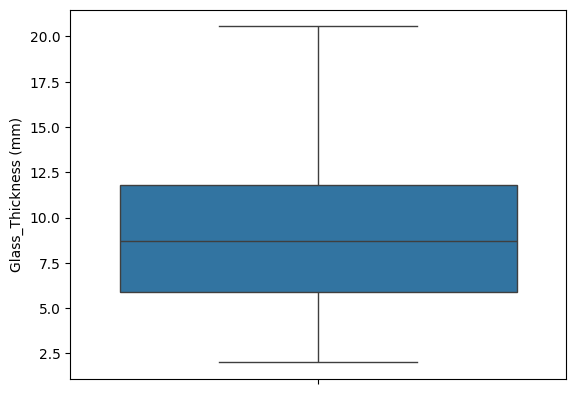

In [38]:
sns.boxplot(df['Glass_Thickness (mm)'])

In [39]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Production_Target (tons)'])

In [40]:
df = win_df.fit_transform(df)

<Axes: ylabel='Production_Target (tons)'>

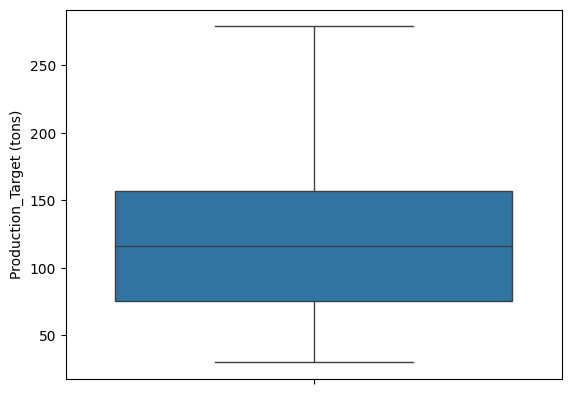

In [41]:
sns.boxplot(df['Production_Target (tons)'])

In [42]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Defects_Percentage (%)'])

In [43]:
df = win_df.fit_transform(df)

<Axes: ylabel='Defects_Percentage (%)'>

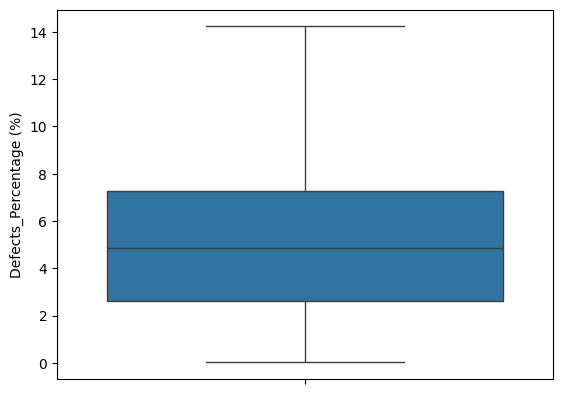

In [44]:
sns.boxplot(df['Defects_Percentage (%)'])

In [45]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Melting_Time (hrs)'])

In [46]:
df = win_df.fit_transform(df)

<Axes: ylabel='Melting_Time (hrs)'>

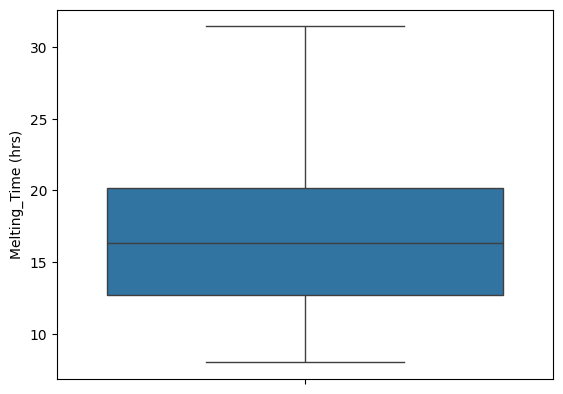

In [47]:
sns.boxplot(df['Melting_Time (hrs)'])

In [48]:
win_df = Winsorizer(capping_method = 'iqr',
                   fold = 1.5,
                   tail = 'both',
                   variables = ['Cooling_Energy (kWh)'])

In [49]:
df = win_df.fit_transform(df)

<Axes: ylabel='Cooling_Energy (kWh)'>

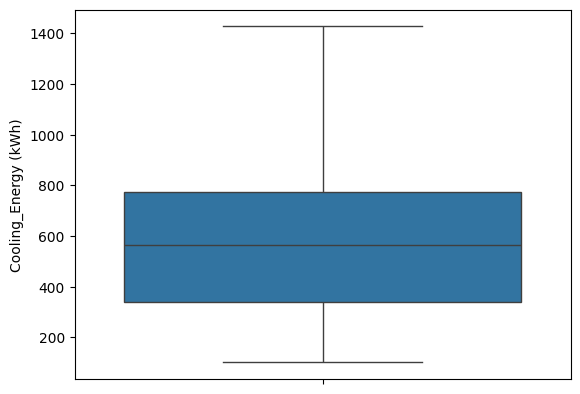

In [50]:
sns.boxplot(df['Cooling_Energy (kWh)'])

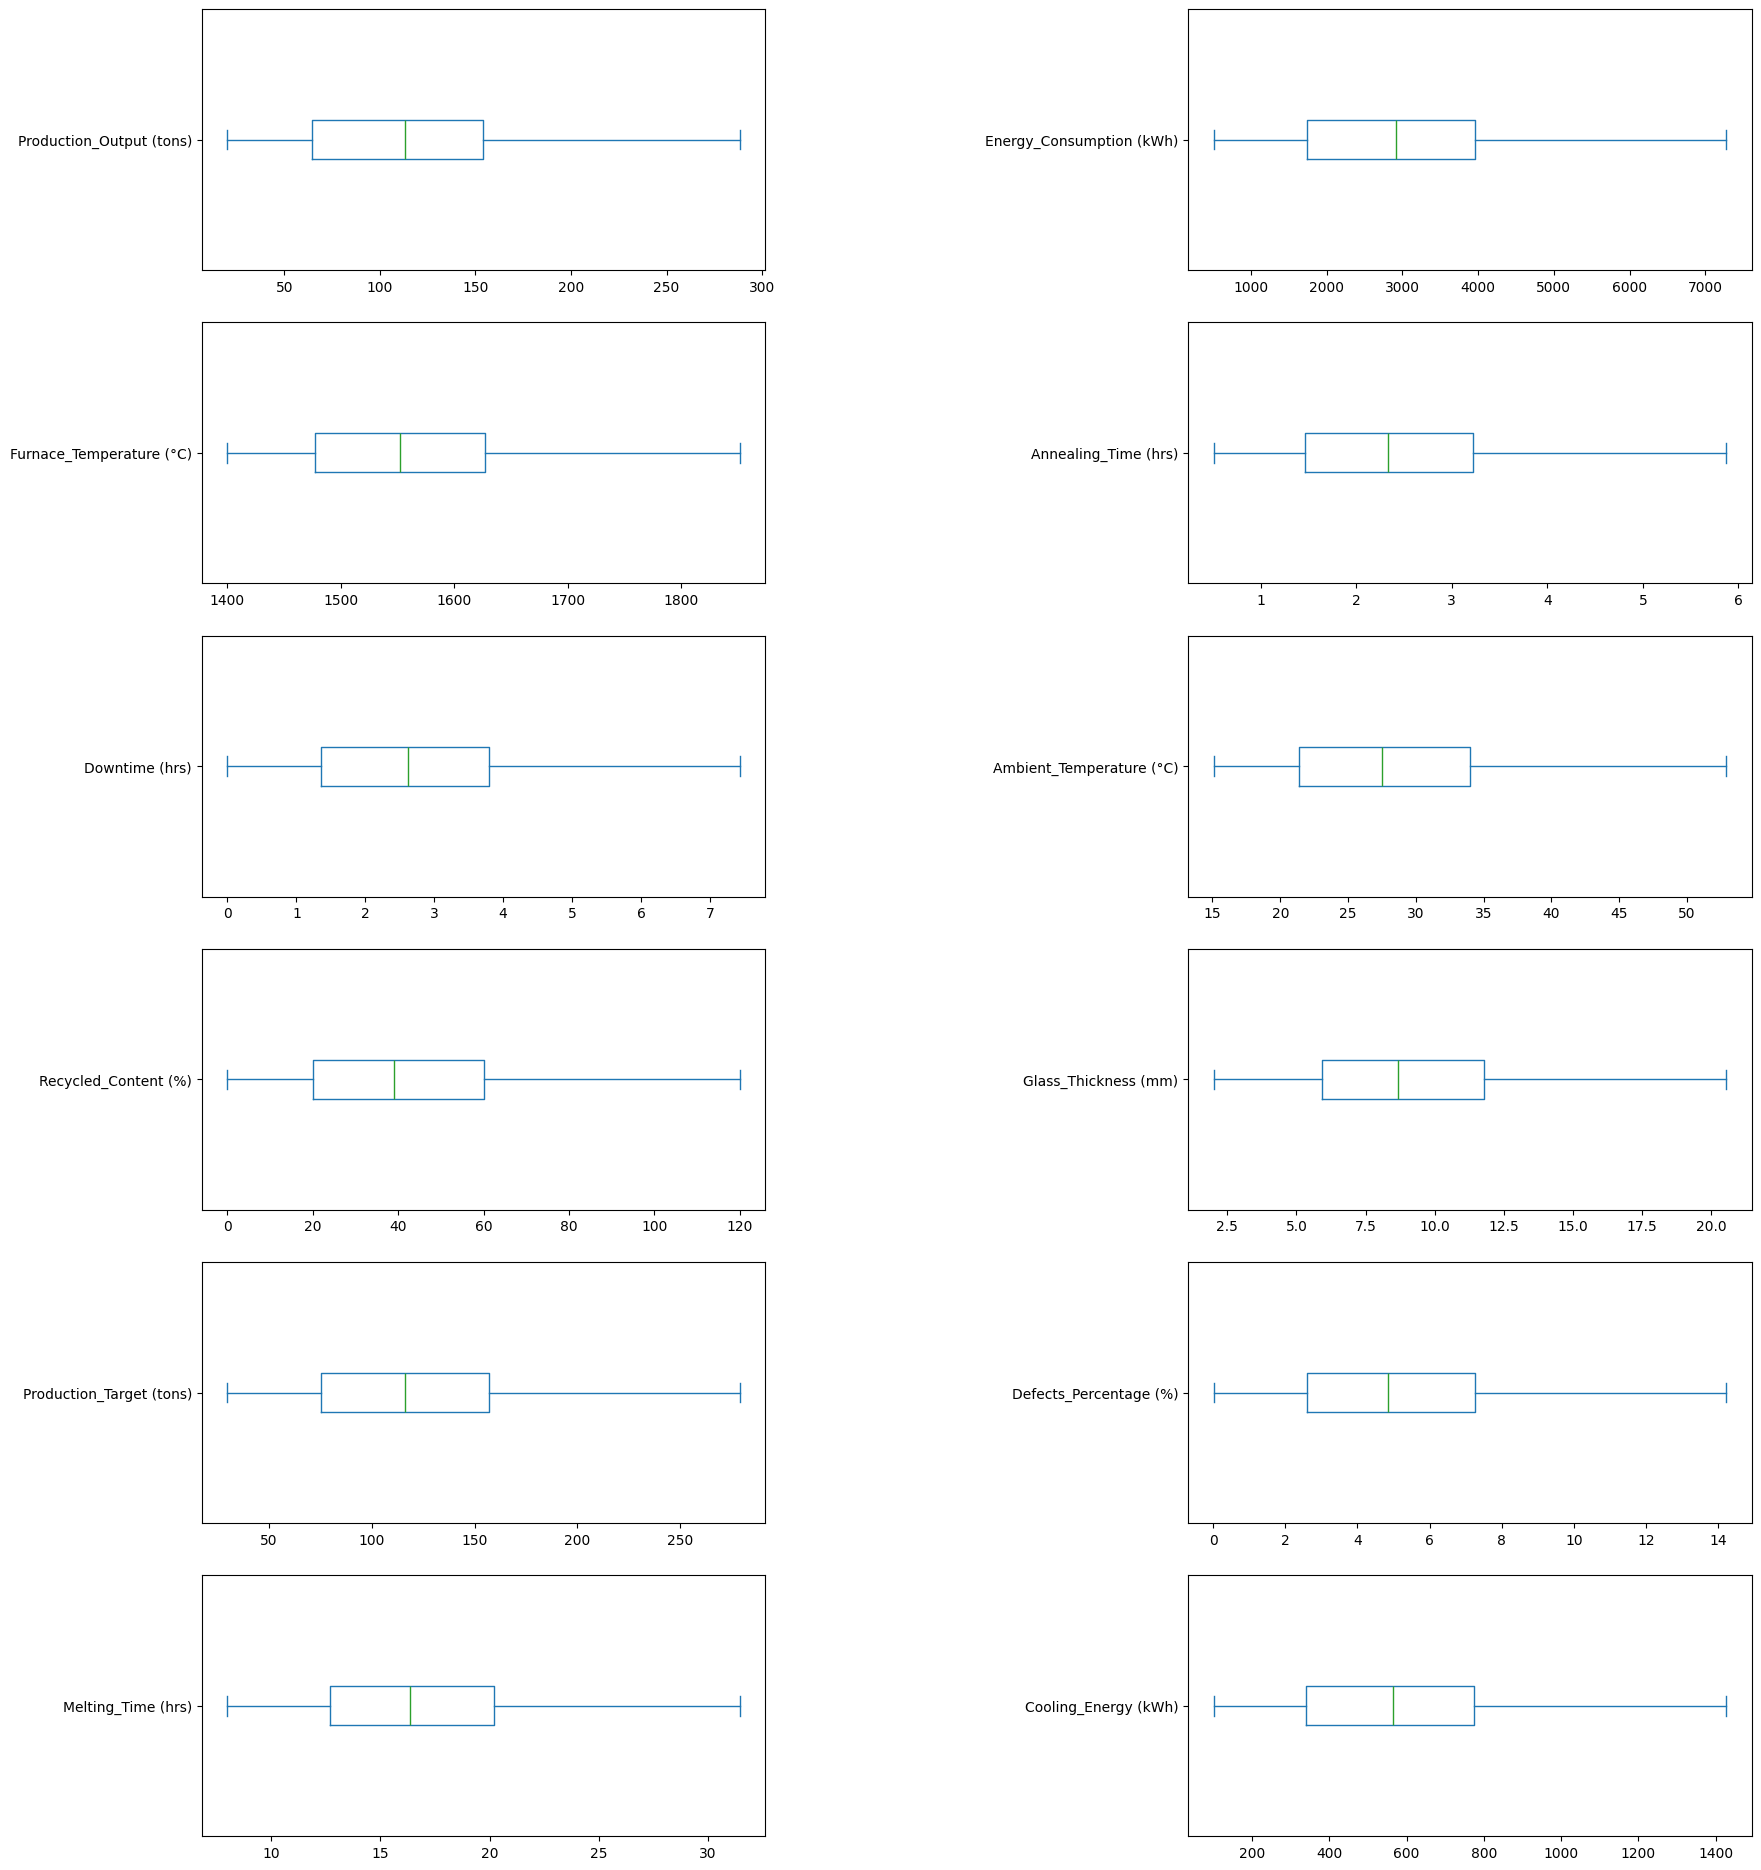

In [51]:
df.plot(kind="box", sharey=False, sharex=False, subplots=True, figsize=(20,40), layout=[10,2],vert=0)
plt.subplots_adjust(wspace=0.75)

Normalization

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Production_Output (tons)'] = scaler.fit_transform(df[['Production_Output (tons)']])
print(df)

                 Date      Shift  Furnace_ID Furnace_Type    Batch_Type  \
0     01-01-2023 0.00    Morning   Furnace_1     Electric  Borosilicate   
1     01-01-2023 1.00  Afternoon   Furnace_6       Hybrid     Soda-lime   
2     01-01-2023 2.00      Night   Furnace_9          Gas          Lead   
3     01-01-2023 3.00  Afternoon   Furnace_9          Gas     Soda-lime   
4     01-01-2023 4.00    Morning   Furnace_6     Electric     Soda-lime   
..                ...        ...         ...          ...           ...   
995  11-02-2023 11.00  Afternoon   Furnace_1     Electric  Borosilicate   
996  11-02-2023 12.00      Night  Furnace_10          Gas          Lead   
997  11-02-2023 13.00      Night   Furnace_7     Electric  Borosilicate   
998  11-02-2023 14.00    Morning   Furnace_2          Gas     Soda-lime   
999  11-02-2023 15.00    Morning   Furnace_7          Gas          Lead   

     Production_Output (tons)  Energy_Consumption (kWh)  \
0                    0.324687           

In [54]:
scaler = MinMaxScaler()
df['Energy_Consumption (kWh)'] = scaler.fit_transform(df[['Energy_Consumption (kWh)']])
print(df)

                 Date      Shift  Furnace_ID Furnace_Type    Batch_Type  \
0     01-01-2023 0.00    Morning   Furnace_1     Electric  Borosilicate   
1     01-01-2023 1.00  Afternoon   Furnace_6       Hybrid     Soda-lime   
2     01-01-2023 2.00      Night   Furnace_9          Gas          Lead   
3     01-01-2023 3.00  Afternoon   Furnace_9          Gas     Soda-lime   
4     01-01-2023 4.00    Morning   Furnace_6     Electric     Soda-lime   
..                ...        ...         ...          ...           ...   
995  11-02-2023 11.00  Afternoon   Furnace_1     Electric  Borosilicate   
996  11-02-2023 12.00      Night  Furnace_10          Gas          Lead   
997  11-02-2023 13.00      Night   Furnace_7     Electric  Borosilicate   
998  11-02-2023 14.00    Morning   Furnace_2          Gas     Soda-lime   
999  11-02-2023 15.00    Morning   Furnace_7          Gas          Lead   

     Production_Output (tons)  Energy_Consumption (kWh)  \
0                    0.324687           

In [55]:
scaler = MinMaxScaler()
columns_to_scale = ['Furnace_Temperature (°C)','Annealing_Time (hrs)','Downtime (hrs)','Ambient_Temperature (°C)','Recycled_Content (%)','Glass_Thickness (mm)','Production_Target (tons)','Defects_Percentage (%)','Melting_Time (hrs)','Cooling_Energy (kWh)']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df)

                 Date      Shift  Furnace_ID Furnace_Type    Batch_Type  \
0     01-01-2023 0.00    Morning   Furnace_1     Electric  Borosilicate   
1     01-01-2023 1.00  Afternoon   Furnace_6       Hybrid     Soda-lime   
2     01-01-2023 2.00      Night   Furnace_9          Gas          Lead   
3     01-01-2023 3.00  Afternoon   Furnace_9          Gas     Soda-lime   
4     01-01-2023 4.00    Morning   Furnace_6     Electric     Soda-lime   
..                ...        ...         ...          ...           ...   
995  11-02-2023 11.00  Afternoon   Furnace_1     Electric  Borosilicate   
996  11-02-2023 12.00      Night  Furnace_10          Gas          Lead   
997  11-02-2023 13.00      Night   Furnace_7     Electric  Borosilicate   
998  11-02-2023 14.00    Morning   Furnace_2          Gas     Soda-lime   
999  11-02-2023 15.00    Morning   Furnace_7          Gas          Lead   

     Production_Output (tons)  Energy_Consumption (kWh)  \
0                    0.324687           

In [56]:
df['Production_Output (tons)_bins'] = pd.cut(df['Production_Output (tons)'], bins=3, labels=['Low', 'Medium', 'High'])
print(df)

                 Date      Shift  Furnace_ID Furnace_Type    Batch_Type  \
0     01-01-2023 0.00    Morning   Furnace_1     Electric  Borosilicate   
1     01-01-2023 1.00  Afternoon   Furnace_6       Hybrid     Soda-lime   
2     01-01-2023 2.00      Night   Furnace_9          Gas          Lead   
3     01-01-2023 3.00  Afternoon   Furnace_9          Gas     Soda-lime   
4     01-01-2023 4.00    Morning   Furnace_6     Electric     Soda-lime   
..                ...        ...         ...          ...           ...   
995  11-02-2023 11.00  Afternoon   Furnace_1     Electric  Borosilicate   
996  11-02-2023 12.00      Night  Furnace_10          Gas          Lead   
997  11-02-2023 13.00      Night   Furnace_7     Electric  Borosilicate   
998  11-02-2023 14.00    Morning   Furnace_2          Gas     Soda-lime   
999  11-02-2023 15.00    Morning   Furnace_7          Gas          Lead   

     Production_Output (tons)  Energy_Consumption (kWh)  \
0                    0.324687           

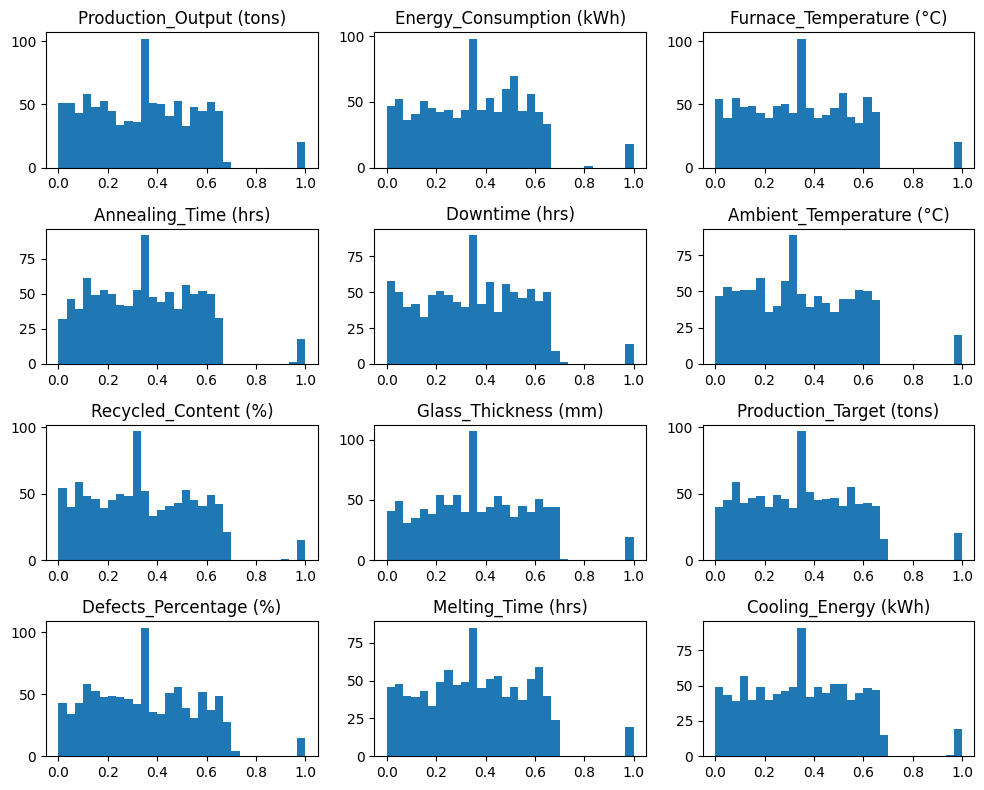

In [57]:

df.hist(bins=30, figsize=(10, 8),grid=False)
plt.tight_layout()
plt.grid(False)
plt.show()

# Production_Output (tons)

 1st business moment (Mean/Median/Mode)

Mean

In [61]:
Mean = df['Production_Output (tons)'].mean()
print(Mean)

0.3444159041942975


Median

In [63]:
Median = df['Production_Output (tons)'].median()
print(Median)

0.3461577921411716


In [64]:
Mode = df['Production_Output (tons)'].mode()
print(Mode)

0    0.346158
Name: Production_Output (tons), dtype: float64


 Second Moment Business Decision / Measures of Dispersion

In [66]:
Standard_Deviation = df['Production_Output (tons)'].std()
print("Standard Deviation of Production Output:", Standard_Deviation)

Standard Deviation of Production Output: 0.21197795137208644


In [67]:
variance = df['Production_Output (tons)'].var()
print("Variance of Performance Rating:", variance)

Variance of Performance Rating: 0.04493465186790665


In [68]:
range = df['Production_Output (tons)'].max() - df['Production_Output (tons)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


 Third Moment Business Decision / Skewness

In [70]:
skewness = df['Production_Output (tons)'].skew()
print(skewness)

0.4491534705841074


 Fourth Moment Business Decision / Kurtosis

In [72]:
kurtosis = df['Production_Output (tons)'].kurtosis()
print(kurtosis)

0.07512064125169848


# Energy_Consumption (kWh) 

First Moment Business Decision / Measures of Central Tendency

In [75]:
Mean = df['Energy_Consumption (kWh)'].mean()
print(Mean)

0.3515810256839596


In [76]:
Median = df['Energy_Consumption (kWh)'].median()
print(Median)

0.3552799590597265


In [77]:
Mode = df['Energy_Consumption (kWh)'].mode()
print(Mode)

0    0.35528
Name: Energy_Consumption (kWh), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [79]:
Standard_Deviation = df['Energy_Consumption (kWh)'].std()
print("Standard Deviation of Energy_Consumption (kWh):", Standard_Deviation)

Standard Deviation of Energy_Consumption (kWh): 0.20490269135161115


In [80]:
variance = df['Energy_Consumption (kWh)'].var()
print("Variance of Energy_Consumption (kWh):", variance)

Variance of Energy_Consumption (kWh): 0.04198511292313363


In [81]:
range = df['Energy_Consumption (kWh)'].max() - df['Energy_Consumption (kWh)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 0.9999999999999999


Third Moment Business Decision / Skewness

In [83]:
skewness = df['Energy_Consumption (kWh)'].skew()
print(skewness)

0.3387701055445194


Fourth Moment Business Decision / Kurtosis

In [85]:
kurtosis = df['Energy_Consumption (kWh)'].kurtosis()
print(kurtosis)

0.1427698850109067


# Furnace_Temperature (°C)

First Moment Business Decision / Measures of Central Tendency

In [88]:
Mean = df['Furnace_Temperature (°C)'].mean()
print(Mean)

0.34373662369280156


In [89]:
Median = df['Furnace_Temperature (°C)'].median()
print(Median)

0.33752005754440306


In [90]:
Mode = df['Furnace_Temperature (°C)'].mode()
print(Mode)

0    0.33752
Name: Furnace_Temperature (°C), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [92]:
Standard_Deviation = df['Furnace_Temperature (°C)'].std()
print("Standard Deviation of Furnace_Temperature (°C):", Standard_Deviation)

Standard Deviation of Furnace_Temperature (°C): 0.2085065327551374


In [93]:
variance = df['Furnace_Temperature (°C)'].var()
print("Variance of Furnace_Temperature (°C):", variance)

Variance of Furnace_Temperature (°C): 0.043474974201569185


In [94]:
range = df['Furnace_Temperature (°C)'].max() - df['Furnace_Temperature (°C)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


Third Moment Business Decision / Skewness

In [96]:
skewness = df['Furnace_Temperature (°C)'].skew()
print(skewness)

0.48188664564919265


Fourth Moment Business Decision / Kurtosis

In [98]:
kurtosis = df['Furnace_Temperature (°C)'].kurtosis()
print(kurtosis)

0.2112858279552592


# Annealing_Time (hrs)

First Moment Business Decision / Measures of Central Tendency

In [101]:
Mean = df['Annealing_Time (hrs)'].mean()
print(Mean)

0.3479319347319347


In [102]:
Median = df['Annealing_Time (hrs)'].median()
print(Median)

0.33939393939393936


In [103]:
Mode = df['Annealing_Time (hrs)'].mode()
print(Mode)

0    0.339394
Name: Annealing_Time (hrs), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [105]:
Standard_Deviation = df['Annealing_Time (hrs)'].std()
print("Standard Deviation of Annealing_Time (hrs)):", Standard_Deviation)

Standard Deviation of Annealing_Time (hrs)): 0.2029600355825872


In [207]:
variance = df['Annealing_Time (hrs)'].var()
print("Variance of Annealing_Time (hrs):", variance)

Variance of Annealing_Time (hrs): 0.04119277604368506


In [209]:
range = df['Annealing_Time (hrs)'].max() - df['Annealing_Time (hrs)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


Third Moment Business Decision / Skewness

In [213]:
skewness = df['Annealing_Time (hrs)'].skew()
print(skewness)

0.469617941520251


Fourth Moment Business Decision / Kurtosis

In [217]:
kurtosis = df['Annealing_Time (hrs)'].kurtosis()
print(kurtosis)

0.2379052490776612


# Downtime (hrs)

First Moment Business Decision / Measures of Central Tendency

In [222]:
Mean = df['Downtime (hrs)'].mean()
print(Mean)

0.3497646267652993


In [224]:
Median = df['Downtime (hrs)'].median()
print(Median)

0.351714862138534


In [226]:
Mode = df['Downtime (hrs)'].mode()
print(Mode)

0    0.351715
Name: Downtime (hrs), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [230]:
Standard_Deviation = df['Downtime (hrs)'].std()
print("Standard Deviation of Downtime (hrs)):", Standard_Deviation)

Standard Deviation of Downtime (hrs)): 0.20693523366522715


In [232]:
variance = df['Downtime (hrs)'].var()
print("Variance of Downtime (hrs):", variance)

Variance of Downtime (hrs): 0.04282219093208216


In [234]:
range = df['Downtime (hrs)'].max() - df['Downtime (hrs)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 0.9999999999999999


Third Moment Business Decision / Skewness

In [238]:
skewness = df['Downtime (hrs)'].skew()
print(skewness)

0.26404294722006805


Fourth Moment Business Decision / Kurtosis

In [242]:
kurtosis = df['Downtime (hrs)'].kurtosis()
print(kurtosis)

-0.19498543605829832


# Ambient_Temperature (Â°C)

First Moment Business Decision / Measures of Central Tendency

In [249]:
Mean = df['Ambient_Temperature (°C)'].mean()
print(Mean)

0.33900529100529103


In [251]:
Median = df['Ambient_Temperature (°C)'].median()
print(Median)

0.328042328042328


In [253]:
Mode = df['Ambient_Temperature (°C)'].mode()
print(Mode)

0    0.328042
Name: Ambient_Temperature (°C), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [257]:
Standard_Deviation = df['Ambient_Temperature (°C)'].std()
print("Standard Deviation of Ambient_Temperature (°C)):", Standard_Deviation)

Standard Deviation of Ambient_Temperature (°C)): 0.21076170582514953


In [259]:
variance = df['Ambient_Temperature (°C)'].var()
print("Variance of Downtime (hrs):", variance)

Variance of Downtime (hrs): 0.04442049664232687


In [261]:
range = df['Ambient_Temperature (°C)'].max() - df['Downtime (hrs)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


Third Moment Business Decision / Skewness

In [265]:
skewness = df['Ambient_Temperature (°C)'].skew()
print(skewness)

0.5113722433730514


Fourth Moment Business Decision / Kurtosis

In [269]:
kurtosis = df['Ambient_Temperature (°C)'].kurtosis()
print(kurtosis)

0.15636641818504682


# Recycled_Content (%)

First Moment Business Decision / Measures of Central Tendency

In [274]:
Mean = df['Recycled_Content (%)'].mean()
print(Mean)

0.34045000000000003


In [276]:
Median = df['Recycled_Content (%)'].median()
print(Median)

0.325


In [278]:
Mode = df['Recycled_Content (%)'].mode()
print(Mode)

0    0.325
Name: Recycled_Content (%), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [282]:
Standard_Deviation = df['Recycled_Content (%)'].std()
print("Standard Deviation of Recycled_Content (%)):", Standard_Deviation)

Standard Deviation of Recycled_Content (%)): 0.20929137143211032


In [284]:
variance = df['Recycled_Content (%)'].var()
print("Variance of Recycled_Content (%):", variance)

Variance of Recycled_Content (%): 0.04380287815593357


In [286]:
range = df['Recycled_Content (%)'].max() - df['Recycled_Content (%)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


Third Moment Business Decision / Skewness

In [290]:
skewness = df['Recycled_Content (%)'].skew()
print(skewness)

0.4004404819637177


Fourth Moment Business Decision / Kurtosis

In [294]:
kurtosis = df['Recycled_Content (%)'].kurtosis()
print(kurtosis)

-0.10790573871144549


# Glass_Thickness (mm)

First Moment Business Decision / Measures of Central Tendency

In [299]:
Mean = df['Glass_Thickness (mm)'].mean()
print(Mean)

0.368329377654912


In [301]:
Median = df['Glass_Thickness (mm)'].median()
print(Median)

0.3603263434697593


In [303]:
Mode = df['Glass_Thickness (mm)'].mode()
print(Mode)

0    0.360326
Name: Glass_Thickness (mm), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [307]:
Standard_Deviation = df['Glass_Thickness (mm)'].std()
print("Standard Deviation of Glass_Thickness (mm)):", Standard_Deviation)

Standard Deviation of Glass_Thickness (mm)): 0.21076739469970104


In [309]:
variance = df['Glass_Thickness (mm)'].var()
print("Variance of Glass_Thickness (mm):", variance)

Variance of Glass_Thickness (mm): 0.04442289466849957


In [311]:
range = df['Glass_Thickness (mm)'].max() - df['Glass_Thickness (mm)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 0.9999999999999999


Third Moment Business Decision / Skewness

In [315]:
skewness = df['Glass_Thickness (mm)'].skew()
print(skewness)

0.34633579960065314


Fourth Moment Business Decision / Kurtosis

In [319]:
kurtosis = df['Glass_Thickness (mm)'].kurtosis()
print(kurtosis)

-0.06886494662377007


# Production_Target (tons)

First Moment Business Decision / Measures of Central Tendency

In [324]:
Mean = df['Production_Target (tons)'].mean()
print(Mean)

0.3507981514968857


In [326]:
Median = df['Production_Target (tons)'].median()
print(Median)

0.34653405666063897


In [328]:
Mode = df['Production_Target (tons)'].mode()
print(Mode)

0    0.346534
Name: Production_Target (tons), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [332]:
Standard_Deviation = df['Production_Target (tons)'].std()
print("Standard Deviation of Production_Target (tons)):", Standard_Deviation)

Standard Deviation of Production_Target (tons)): 0.2098716734579185


In [334]:
variance = df['Production_Target (tons)'].var()
print("Variance of Production_Target (tons):", variance)

Variance of Production_Target (tons): 0.044046119320027166


In [336]:
range = df['Production_Target (tons)'].max() - df['Production_Target (tons)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 0.9999999999999999


Third Moment Business Decision / Skewness

In [340]:
skewness = df['Production_Target (tons)'].skew()
print(skewness)

0.4543196334538906


Fourth Moment Business Decision / Kurtosis

In [344]:
kurtosis = df['Production_Target (tons)'].kurtosis()
print(kurtosis)

0.10923929561481183


# Defects_Percentage (%)

First Moment Business Decision / Measures of Central Tendency

In [349]:
Mean = df['Defects_Percentage (%)'].mean()
print(Mean)

0.35158435272375255


In [351]:
Median = df['Defects_Percentage (%)'].median()
print(Median)

0.3393470034321922


In [353]:
Mode = df['Defects_Percentage (%)'].mode()
print(Mode)

0    0.339347
Name: Defects_Percentage (%), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [357]:
Standard_Deviation = df['Defects_Percentage (%)'].std()
print("Standard Deviation of Defects_Percentage (%)):", Standard_Deviation)

Standard Deviation of Defects_Percentage (%)): 0.2072314661712247


In [359]:
variance = df['Defects_Percentage (%)'].var()
print("Variance of Defects_Percentage (%):", variance)

Variance of Defects_Percentage (%): 0.04294488057147545


In [361]:
range = df['Defects_Percentage (%)'].max() - df['Defects_Percentage (%)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


Third Moment Business Decision / Skewness

In [365]:
skewness = df['Defects_Percentage (%)'].skew()
print(skewness)

0.4002271818069172


Fourth Moment Business Decision / Kurtosis

In [371]:
kurtosis = df['Defects_Percentage (%)'].kurtosis()
print(kurtosis)

-0.14480158752085526


# Melting_Time (hrs)


First Moment Business Decision / Measures of Central Tendency

In [376]:
Mean = df['Melting_Time (hrs)'].mean()
print(Mean)

0.35994669509594884


In [378]:
Median = df['Melting_Time (hrs)'].median()
print(Median)

0.3560767590618337


In [380]:
Mode = df['Melting_Time (hrs)'].mode()
print(Mode)

0    0.356077
Name: Melting_Time (hrs), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [384]:
Standard_Deviation = df['Melting_Time (hrs)'].std()
print("Standard Deviation of Melting_Time (hrs)):", Standard_Deviation)

Standard Deviation of Melting_Time (hrs)): 0.2102485975466475


In [386]:
variance = df['Melting_Time (hrs)'].var()
print("Variance of Melting_Time (hrs):", variance)

Variance of Melting_Time (hrs): 0.04420447277033215


In [388]:
range = df['Melting_Time (hrs)'].max() - df['Melting_Time (hrs)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 1.0


Third Moment Business Decision / Skewness

In [392]:
skewness = df['Melting_Time (hrs)'].skew()
print(skewness)

0.36094634498185646


Fourth Moment Business Decision / Kurtosis

In [396]:
kurtosis = df['Melting_Time (hrs)'].kurtosis()
print(kurtosis)

-0.019154625955555282


# Cooling_Energy (kWh)

First Moment Business Decision / Measures of Central Tendency

In [401]:
Mean = df['Cooling_Energy (kWh)'].mean()
print(Mean)

0.3541997525706365


In [403]:
Median = df['Cooling_Energy (kWh)'].median()
print(Median)

0.3490431192306134


In [405]:
Mode = df['Cooling_Energy (kWh)'].mode()
print(Mode)

0    0.349043
Name: Cooling_Energy (kWh), dtype: float64


Second Moment Business Decision / Measures of Dispersion

In [409]:
Standard_Deviation = df['Cooling_Energy (kWh)'].std()
print("Standard Deviation of Cooling_Energy (kWh)):", Standard_Deviation)

Standard Deviation of Cooling_Energy (kWh)): 0.21010650434138933


In [411]:
variance = df['Cooling_Energy (kWh)'].var()
print("Variance of Cooling_Energy (kWh):", variance)

Variance of Cooling_Energy (kWh): 0.044144743166558253


In [413]:
range = df['Cooling_Energy (kWh)'].max() - df['Cooling_Energy (kWh)'].min()
print("Range of Years of Experience:", range)

Range of Years of Experience: 0.9999999999999999


Third Moment Business Decision / Skewness

In [417]:
skewness = df['Cooling_Energy (kWh)'].skew()
print(skewness)

0.40286337484550694


Fourth Moment Business Decision / Kurtosis

In [421]:
kurtosis = df['Cooling_Energy (kWh)'].kurtosis()
print(kurtosis)

0.04130552214472605
